## Problem Statement

You are a die hard Lego enthusiast wishing to collect as many board sets as you can. But before that you wish to be able to predict the price of a new lego product before its price is revealed so that you can budget it from your revenue. Since (luckily!), you are a data scientist in the making, you wished to solve this problem yourself. This dataset contains information on lego sets scraped from lego.com. Each observation is a different lego set with various features like how many pieces in the set, rating for the set, number of reviews per set etc. Your aim is to build a linear regression model to predict the price of a set. 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [3]:
df_train = pd.read_csv('./train.csv')
df_train.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,8,155.8800,202,2469,4.7,1,4.9,9,4.7,7,0
1,26,19.9900,9,252,4.8,0,4.6,39,4.6,20,1
2,26,91.6980,56,659,4.6,0,4.6,34,3.9,4,2
3,11,24.3878,1,19,3.0,5,4.0,13,4.0,10,3
4,7,609.9878,84,4016,4.5,1,3.9,34,3.5,10,4


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               8582 non-null   int64  
 1   list_price         8582 non-null   float64
 2   num_reviews        8582 non-null   int64  
 3   piece_count        8582 non-null   int64  
 4   play_star_rating   8582 non-null   float64
 5   review_difficulty  8582 non-null   int64  
 6   star_rating        8582 non-null   float64
 7   theme_name         8582 non-null   int64  
 8   val_star_rating    8582 non-null   float64
 9   country            8582 non-null   int64  
 10  Id                 8582 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 737.6 KB


In [10]:
df.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
count,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000
mean,16.649149,64.493463,14.680727,486.677464,3.697809,1.994640,3.904649,20.482172,3.597448,10.045211,4290.500000
std,8.186261,89.871631,34.867561,802.789725,1.653742,1.792387,1.617678,11.948618,1.624698,6.191468,2477.554338
min,0.000000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,19.990000,1.000000,95.000000,3.600000,0.000000,4.000000,9.000000,3.500000,4.000000,2145.250000
50%,19.000000,36.587800,4.000000,214.000000,4.400000,2.000000,4.600000,21.000000,4.200000,10.000000,4290.500000
75%,23.000000,71.298000,12.000000,544.000000,4.700000,4.000000,4.900000,34.000000,4.700000,15.000000,6435.750000
max,30.000000,1104.870000,367.000000,7541.000000,5.000000,5.000000,5.000000,40.000000,5.000000,20.000000,8581.000000


In [11]:
df_train.drop('Id', axis=1, inplace=True)
df_train.columns

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country'],
      dtype='object')

In [16]:
X = df_train.drop('list_price', axis=1)
y = df_train['list_price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape)

(6865, 9) (1717, 9)


### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

In [22]:
X.head()

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,8,202,2469,4.7,1,4.9,9,4.7,7
1,26,9,252,4.8,0,4.6,39,4.6,20
2,26,56,659,4.6,0,4.6,34,3.9,4
3,11,1,19,3.0,5,4.0,13,4.0,10
4,7,84,4016,4.5,1,3.9,34,3.5,10


In [37]:
cont_columns = ['ages', 'num_reviews', 'piece_count', 'play_star_rating', 'star_rating', 'val_star_rating']

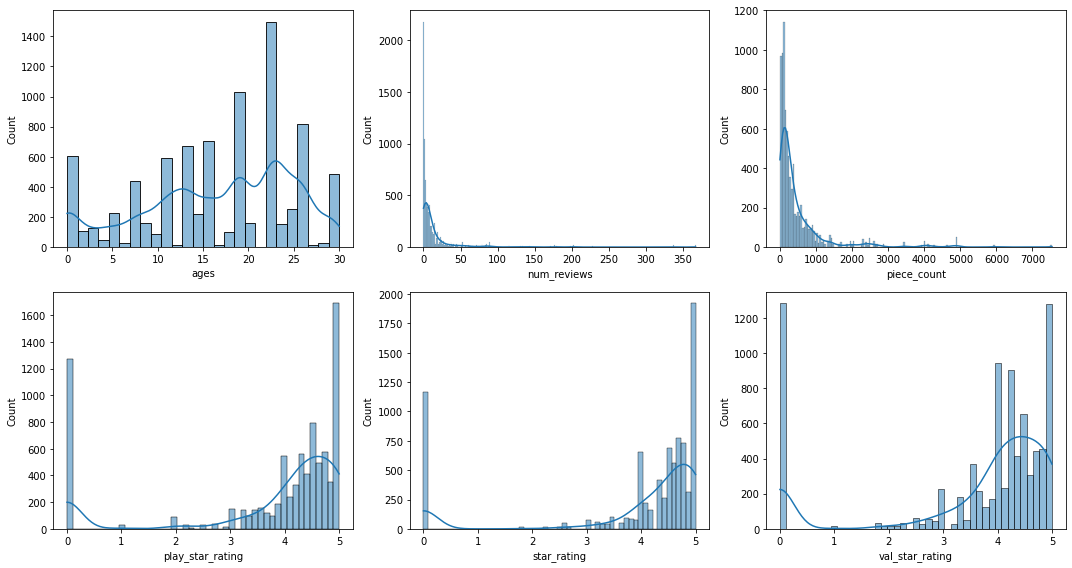

In [40]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
ax = ax.flatten()

for i, icol in enumerate(cont_columns):
    sns.histplot(X[icol], ax=ax[i], kde=True)

plt.tight_layout()
plt.show()

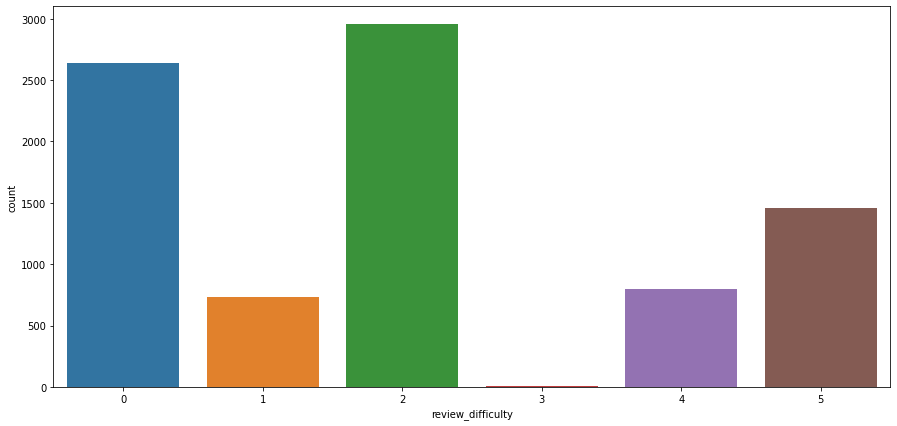

In [46]:
plt.figure(figsize=(15, 7))
sns.countplot(x='review_difficulty', data=X)
plt.show()

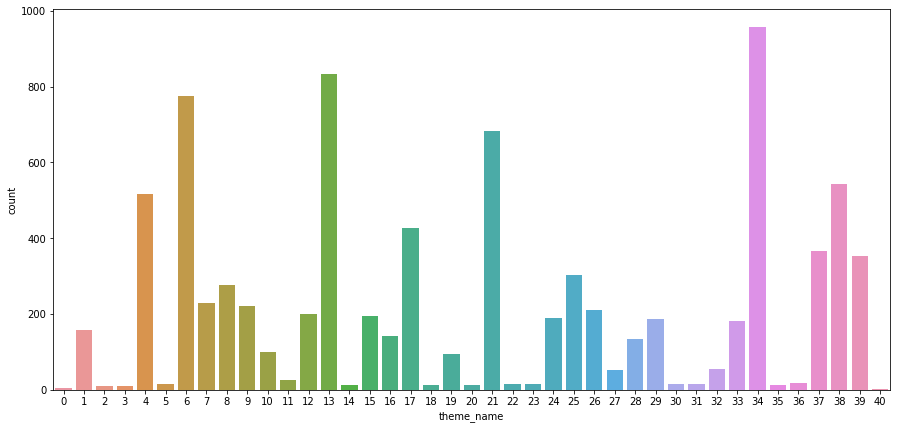

In [45]:
plt.figure(figsize=(15, 7))
sns.countplot(x='theme_name', data=X)
plt.show()

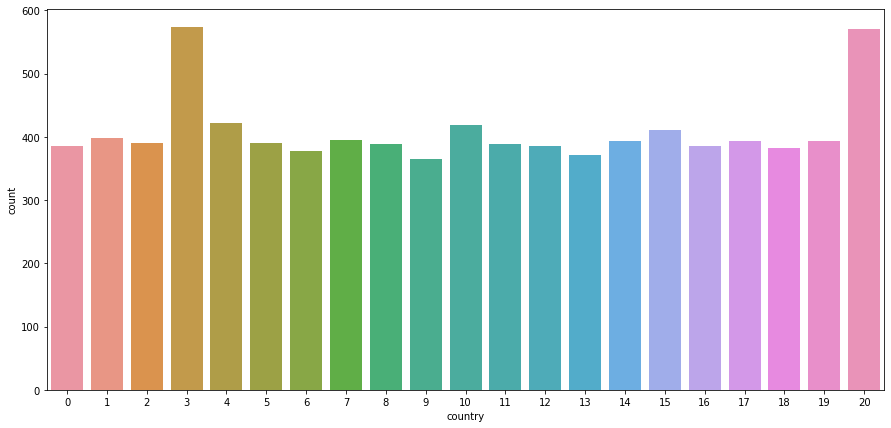

In [48]:
plt.figure(figsize=(15, 7))
sns.countplot(x='country', data=X)
plt.show()

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

In [61]:
crr_mat = df_train.corr()
crr_mat['list_price'].sort_values(ascending=False)

list_price           1.000000
piece_count          0.866119
num_reviews          0.439499
theme_name           0.192707
play_star_rating     0.145151
star_rating          0.126577
val_star_rating      0.114612
country              0.018192
ages                -0.076763
review_difficulty   -0.284760
Name: list_price, dtype: float64

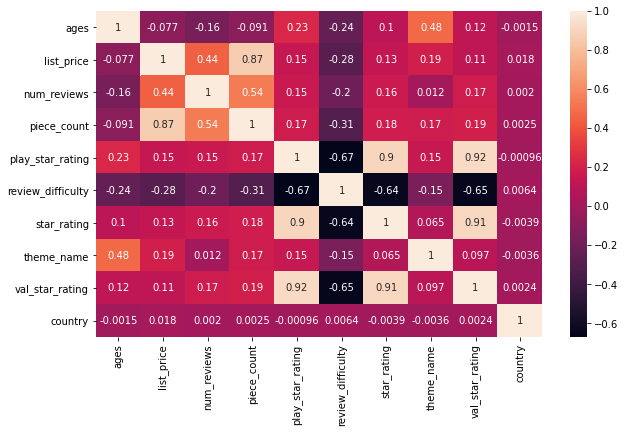

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(crr_mat, annot=True)
plt.show()

### Feature Scaling

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
print(X_train.shape, X_val.shape)

(6865, 9) (1717, 9)


### Model building

In [55]:
lr = LinearRegression() # Ridge()
lr.fit(X_train, y_train)

# #To retrieve the intercept:
# print(lr.intercept_)
# #For retrieving the slope:
# print(lr.coef_)
y_pred = lr.predict(X_val)
print(y_val.shape, y_pred.shape)

print(f'Training R2 score (LR): {r2_score(y_train, lr.predict(X_train))}')
print(f'Validation R2 Score (LR): {r2_score(y_val, y_pred)}')

(1717,) (1717,)
Training R2 score (LR): 0.7770175924418554
Validation R2 Score (LR): 0.7481227547780814


### Residual check!

- Check the distribution of the residual.

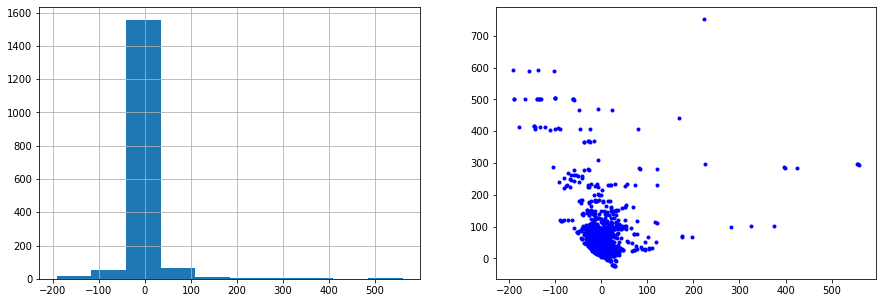

In [56]:
# Assumption-1 (LR): Residuals are normally distributed

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

resid = y_val - y_pred
resid.hist(ax=ax1)
ax2 = plt.plot(resid, y_pred, 'b.')
plt.show()

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [57]:
df_test = pd.read_csv('test.csv')
df_test.head()

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,26,8,941,4.6,0,4.6,33,4.3,16,9907
1,11,0,19,0.0,5,0.0,13,0.0,7,5243
2,29,34,1376,4.0,1,4.3,34,3.8,12,8276
3,26,0,369,0.0,5,0.0,28,0.0,9,6501
4,11,1,19,3.0,5,4.0,13,4.0,0,1619


In [58]:
#df_test['Id'] = .copy()

X_test = df_test.drop('Id', axis=1)
X_test = scaler.transform(X_test)

y_pred = lr.predict(X_test)

submission = pd.DataFrame({'Id':df_test['Id'], 'list_price': y_pred})
submission.head()

,Id,list_price
0,9907,116.186560
1,5243,23.746767
2,8276,150.527675
3,6501,52.738820
4,1619,-9.411458


In [59]:
submission.to_csv('submission.csv', index=False)